Citation: Rafael Duarte, March 19th, “Spotify_K_Means_Clustering”, Source Code, 
https://github.com/rafaelnduarte/Spotify_K-Means_Clustering/blob/master/Spotify_Clulstering.ipynb

In [296]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [297]:
#installing the necessary packages
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd

In [298]:
# pull the csv file from my device with the song data
df = pd.read_csv('/Users/ragave/Downloads/arianagrande_spotify.csv')
# remove duplicate danceability column from the original data
df = df.drop(columns=['danceability.1'])
# display the first 5 rows of the dataframe
df.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.462,0.0,0.0946,-5.308,0.0312,127.698,4
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.585,0.0,0.2480,-6.476,0.0940,109.978,4
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.742,0.0,0.1660,-5.664,0.0652,116.965,4
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.607,0.0,0.1250,-5.156,0.1650,128.006,4
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.522,0.0,0.3980,-7.295,0.0981,88.332,1


In [299]:
# creating a copy of the dataset
df_canalysis = df.copy()
df_canalysis = df_canalysis.iloc[:300]

In [300]:
# retreive the column names
df.columns

Index(['Unnamed: 0', 'name', 'album', 'artist', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')

In [301]:
# creating a dataframe without the categorical features
# do not include unnamed, name, album, artist, release_date, and length
X = df_canalysis.iloc[:, [6,7,8,9,10,11,12,13,14,15]].values

In [302]:
# display the copy of the dataset
print(X.shape)
df_canalysis.head()

(90, 10)


,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.462,0.0,0.0946,-5.308,0.0312,127.698,4
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.585,0.0,0.2480,-6.476,0.0940,109.978,4
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.742,0.0,0.1660,-5.664,0.0652,116.965,4
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.607,0.0,0.1250,-5.156,0.1650,128.006,4
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.522,0.0,0.3980,-7.295,0.0981,88.332,1


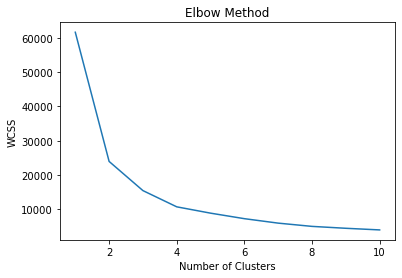

In [320]:
# finding out how many number of clusters are needed
wcss = []
# create the plot of the elbow method
# use the dataframe without the categorical variables
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

The Elbow method is being used with the within cluster sum of errors (wcss) in order to find the optimal number of clusters. According the plot above, the optimal number of clusters is 4 since there is a clear elbow. 

In [325]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
#scaling each feature to a given range
scaler = MinMaxScaler()

In [326]:
# scale the dataframe without the categorical variables
scaled = scaler.fit_transform(X)

In [327]:
# instantiating model
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
preds_kmeans = kmeans.fit_predict(scaled)

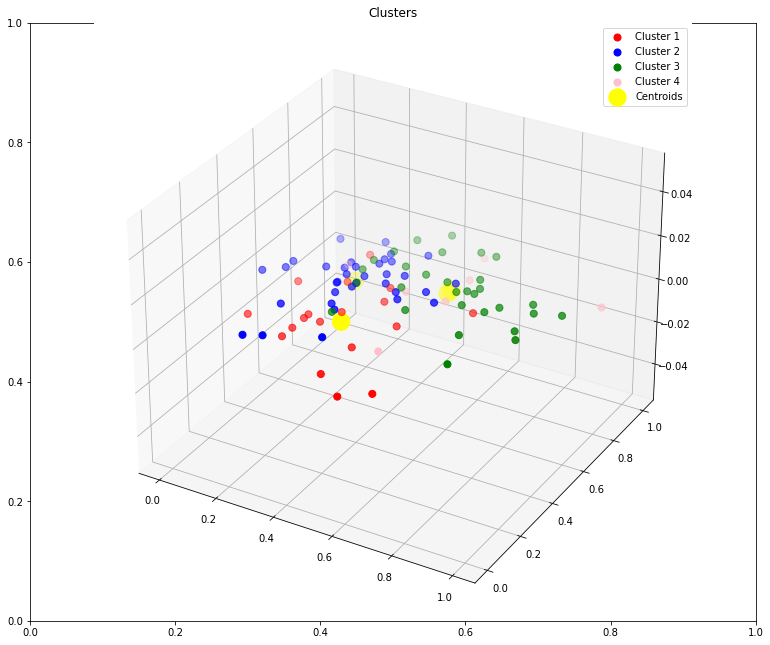

In [333]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
# display cluster 1
plt.scatter(scaled[preds_kmeans == 0,0],scaled[preds_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
# display cluster 2 
plt.scatter(scaled[preds_kmeans == 1,0], scaled[preds_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
# display cluster 3
plt.scatter(scaled[preds_kmeans == 2,0], scaled[preds_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
# display cluster 4
plt.scatter(scaled[preds_kmeans == 3,0], scaled[preds_kmeans == 3,1], s= 50, c= 'pink', label= 'Cluster 4')
# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [308]:
# predictions of cluster arrangement
preds_kmeans

array([0, 2, 1, 1, 0, 0, 1, 2, 2, 3, 1, 1, 1, 0, 2, 2, 3, 2, 2, 2, 0, 3,
       2, 3, 2, 1, 0, 2, 3, 2, 2, 0, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2,
       1, 2, 3, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1], dtype=int32)

In [309]:
# putting the predictions into a dataframe
kmeans = pd.DataFrame(data=preds_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# dataframe with predictions
print(kmeans.shape)
kmeans.head()

(90, 1)


,k_cluster
0,0
1,2
2,1
3,1
4,0


In [310]:
# concatenating the cluster column to the dataframe
df_canalysis = pd.concat([df_canalysis, kmeans], axis=1)

# print the concatenated data frame
print(df_canalysis.shape)
df_canalysis.head()

(90, 17)


,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_cluster
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.462,0.0,0.0946,-5.308,0.0312,127.698,4,0
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.585,0.0,0.2480,-6.476,0.0940,109.978,4,2
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.742,0.0,0.1660,-5.664,0.0652,116.965,4,1
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.607,0.0,0.1250,-5.156,0.1650,128.006,4,1
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.522,0.0,0.3980,-7.295,0.0981,88.332,1,0


In [314]:
#Popularity Mean of each cluster
df_canalysis.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
2    69.300000
3    69.285714
0    62.055556
1    58.600000
Name: popularity, dtype: float64

In [312]:
# checking the number of songs in each cluster
df_canalysis['k_cluster'].value_counts()

1    35
2    30
0    18
3     7
Name: k_cluster, dtype: int64

In [313]:
# checking the songs in cluster 1
df_canalysis.loc[df_canalysis['k_cluster'] == 0]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_cluster
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.801,0.462,0.000000,0.0946,-5.308,0.0312,127.698,4,0
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.519,0.522,0.000000,0.3980,-7.295,0.0981,88.332,1,0
5,5,six thirty,Positions (Deluxe),Ariana Grande,2021-02-19,183874,57,0.739,0.670,0.516,0.000000,0.1510,-7.154,0.0539,120.109,4,0
13,13,pov,Positions (Deluxe),Ariana Grande,2021-02-19,201882,60,0.487,0.360,0.534,0.000000,0.1000,-5.664,0.0555,131.798,4,0
20,20,needy,"thank u, next",Ariana Grande,2019-02-08,171573,74,0.647,0.780,0.309,0.000007,0.2020,-7.948,0.0366,87.045,4,0
26,26,ghostin,"thank u, next",Ariana Grande,2019-02-08,271466,70,0.287,0.418,0.364,0.000018,0.1850,-8.295,0.0306,103.777,4,0
31,31,raindrops (an angel cried),Sweetener,Ariana Grande,2018-08-17,37640,66,0.336,0.942,0.231,0.000000,0.1880,-6.217,0.0497,168.685,5,0
44,44,pete davidson,Sweetener,Ariana Grande,2018-08-17,73813,63,0.652,0.430,0.310,0.000012,0.1820,-10.212,0.0509,119.913,4,0
45,45,get well soon,Sweetener,Ariana Grande,2018-08-17,322026,64,0.604,0.657,0.449,0.000000,0.0932,-6.564,0.0353,100.355,4,0
46,46,Moonlight,Dangerous Woman,Ariana Grande,2016-05-20,202360,58,0.633,0.420,0.412,0.000004,0.0480,-7.339,0.0284,102.215,3,0


This is the first cluster with a high mean value of acousticness, which means that the songs in this cluster are very instrumental. Other significant characteristics of this cluster is that it has a low mean value of tempo and dancability. The tempo refers to "the overall estimated tempo of a track in beats per minute (BPM)" (Spotify API, n.d.). Having a low tempo means that the songs in this cluster are considered to be "slow" songs. Danceability "describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity" (Spotify API, n.d.). Having low mean dancability value means that the songs in this cluster are not particularly made for dancing. 

As someone who listens to Ariana Grande quite frequently I would say that the summary statistics for this cluster is quite accurate. All of the songs in this cluster are very slow and would be considered sad songs. For example, the song ghostin is a sad song about Ariana Grande's ex-boyfriend who had passed away, and the grief and regret she feels following his passing. Another song that has a similar message to ghostin is Almost Is Never Enough, in which Ariana is singing about how she knows that a relationship is over but does not want to admit it.

In [315]:
# checking the songs in the cluster 2
df_canalysis.loc[df_canalysis['k_cluster'] == 1]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_cluster
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.742,0.000000,0.1660,-5.664,0.0652,116.965,4,1
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.607,0.000000,0.1250,-5.156,0.1650,128.006,4,1
6,6,safety net (feat. Ty Dolla $ign),Positions (Deluxe),Ariana Grande,2021-02-19,208457,59,0.552,0.0703,0.599,0.000000,0.0986,-5.750,0.0404,161.884,4,1
10,10,love language,Positions (Deluxe),Ariana Grande,2021-02-19,179860,57,0.688,0.0686,0.573,0.000000,0.0749,-5.030,0.2080,110.034,4,1
11,11,positions,Positions (Deluxe),Ariana Grande,2021-02-19,172324,60,0.737,0.4680,0.802,0.000000,0.0931,-4.771,0.0878,144.015,4,1
12,12,obvious,Positions (Deluxe),Ariana Grande,2021-02-19,146958,57,0.624,0.0967,0.672,0.000000,0.1550,-5.334,0.1060,159.852,4,1
25,25,make up,"thank u, next",Ariana Grande,2019-02-08,140693,67,0.671,0.0844,0.714,0.000001,0.0568,-5.373,0.2100,105.137,3,1
32,32,blazed (feat. Pharrell Williams),Sweetener,Ariana Grande,2018-08-17,196360,57,0.795,0.0793,0.759,0.000000,0.0805,-6.348,0.0528,110.021,4,1
41,41,borderline (feat. Missy Elliott),Sweetener,Ariana Grande,2018-08-17,177533,59,0.761,0.0580,0.818,0.000000,0.1100,-5.238,0.0978,110.990,4,1
49,49,Into You,Dangerous Woman,Ariana Grande,2016-05-20,244440,65,0.623,0.0162,0.734,0.000002,0.1450,-5.948,0.1070,107.853,4,1


This is the second cluster with a high mean value of energy. Energy is "a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity" (Spotify API, n.d.). Having high energy means that the songs in this cluster are upbeat and lively. Having a high mean value of energy would be accurate for this cluster as it includes many of Ariana Grande's hit singles, such as Side To Side, The Way, and Positions. This cluster also has a high mean value of tempo, which makes sense as again the songs in this cluster are very upbeat. Having a high tempo makes for good hit singles, as these songs help to make listeners feel happy when listening to the particular song. For example, the song Side to Side is extremely fun to listen to and can make you speed up your pace when doing certain activities, such as working out, due to the fast tempo.

Additionally, I noticed that majority of the songs in this cluster come from the Yours Truly and Dangerous Woman albums which are considered to best fit into the 'pop' genre as opposed to her other albums that fit in the 'R&B' genre. This follows with the values that were found in the summary statistics, such that this cluster includes high mean values of energy and tempo.

In [316]:
# checking the songs in the cluster 3
df_canalysis.loc[df_canalysis['k_cluster'] == 2]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_cluster
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.23700,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4,2
7,7,my hair,Positions (Deluxe),Ariana Grande,2021-02-19,158436,58,0.686,0.08150,0.526,0.000008,0.1440,-6.842,0.0374,92.013,4,2
8,8,nasty,Positions (Deluxe),Ariana Grande,2021-02-19,200732,59,0.772,0.08140,0.506,0.000011,0.1820,-6.558,0.1390,127.894,4,2
14,14,someone like u - interlude,Positions (Deluxe),Ariana Grande,2021-02-19,76742,59,0.639,0.17500,0.544,0.000024,0.1400,-9.500,0.0383,118.158,4,2
15,15,test drive,Positions (Deluxe),Ariana Grande,2021-02-19,122174,70,0.698,0.02510,0.708,0.000000,0.1240,-4.943,0.0454,115.036,4,2
17,17,worst behavior,Positions (Deluxe),Ariana Grande,2021-02-19,124281,65,0.726,0.37000,0.667,0.000000,0.1180,-5.956,0.0617,100.053,4,2
18,18,main thing,Positions (Deluxe),Ariana Grande,2021-02-19,129080,62,0.734,0.31700,0.475,0.000001,0.1130,-7.770,0.0403,134.119,4,2
19,19,imagine,"thank u, next",Ariana Grande,2019-02-08,212266,72,0.729,0.37800,0.475,0.000000,0.1200,-4.985,0.0364,62.520,3,2
22,22,bloodline,"thank u, next",Ariana Grande,2019-02-08,216893,71,0.758,0.08150,0.665,0.000157,0.2160,-5.188,0.0774,151.976,4,2
24,24,bad idea,"thank u, next",Ariana Grande,2019-02-08,267106,70,0.847,0.02680,0.579,0.054500,0.1020,-5.314,0.0719,137.998,4,2


This is the third cluster with a high mean value of dancability. Danceability "describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity" (Spotify API, n.d.). Having a high value for dancability means that the songs in this cluster are very good for dancing to. This makes sense as many of these songs are known to be played frequently on the radio, parties, and/or clubs. Also, many of the songs in this cluster are usually remixed by DJs due to their high level of dancability. For example, Break Free and 34+35 are songs that have been popularly remixed. Additionally, this cluster has the highest mean value of instrumentalness. Instrumentalness "predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context" (Spotify API, n.d.). The closer this value is to 1 the less vocal content in the song. This makes sense for this cluster as song that are usually more danceable contain less lyrics because the focus is on the songs beat.

In [317]:
# checking the songs in the cluster 4
df_canalysis.loc[df_canalysis['k_cluster'] == 3][:10]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_cluster
9,9,west side,Positions (Deluxe),Ariana Grande,2021-02-19,132278,56,0.688,0.186,0.455,0.000000,0.0794,-8.632,0.199,87.865,4,3
16,16,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...",Positions (Deluxe),Ariana Grande,2021-02-19,182437,70,0.659,0.211,0.662,0.000000,0.2280,-5.768,0.434,109.957,4,3
21,21,NASA,"thank u, next",Ariana Grande,2019-02-08,182000,70,0.747,0.451,0.458,0.000000,0.2520,-6.891,0.303,75.029,4,3
23,23,fake smile,"thank u, next",Ariana Grande,2019-02-08,208880,69,0.450,0.329,0.619,0.000000,0.3190,-7.412,0.372,83.300,4,3
28,28,7 rings,"thank u, next",Ariana Grande,2019-02-08,178626,86,0.778,0.592,0.317,0.000000,0.0881,-10.732,0.334,140.048,4,3
34,34,R.E.M,Sweetener,Ariana Grande,2018-08-17,245666,69,0.831,0.375,0.485,0.000015,0.1180,-6.677,0.150,80.022,4,3
68,68,Best Mistake,My Everything (Deluxe),Ariana Grande,2014-08-25,233733,65,0.654,0.546,0.578,0.000000,0.1120,-6.897,0.449,143.867,4,3


This is the fourth cluster, it has the highest mean value for speechiness. "Speechiness detects the presence of spoken words in a track" (Spotify API, n.d.). The closer this value is to 1, the greater the recording is speech-like. The high mean value for speechiness for this particular cluster makes sense due to these particular songs being heavily influenced by rap. For example, the 34+35 Remix includes two of the most famous female rappers, Megan Thee Stallion and Doja Cat, who each have a verse on the song in which they use the rap style. Another song that makes sense to be in this cluser is 7 Rings, which is heavily influenced by the rap style. Additionally, the song has been sampled by many rap artists such as Pop Smoke for his song Mannequin.

In [319]:
df_canalysis.groupby("k_cluster").mean()

,Unnamed: 0,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
k_cluster,,,,,,,,,,,,
0,43.277778,198479.833333,62.055556,0.505556,0.629944,0.386333,0.000006,0.168756,-7.211833,0.042994,102.365444,3.777778
1,56.285714,208318.085714,58.600000,0.642571,0.126511,0.729229,0.000029,0.192689,-5.029371,0.096974,121.065343,3.942857
2,35.233333,194520.433333,69.300000,0.701000,0.116112,0.589233,0.001833,0.149957,-6.089300,0.066057,116.996600,3.900000
3,28.428571,194802.857143,69.285714,0.686714,0.384286,0.510571,0.000002,0.170929,-7.572714,0.320143,102.869714,4.000000
